In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Basic Linear Model

Text(0.5,1,'y = 4 + 3x with Gaussian Noise')

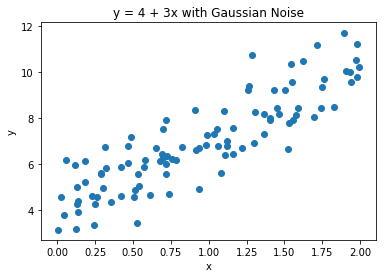

In [23]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
plt.ylabel("y")
plt.xlabel("x")
plt.scatter(X,y)
plt.title('y = 4 + 3x with Gaussian Noise')

In [22]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[ 4.2207821 ]
 [ 2.87629865]]


In [24]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.2207821],
       [ 9.9733794]])

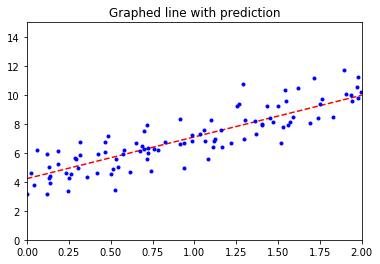

In [29]:
plt.plot(X_new, y_predict, "r--")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.title("Graphed line with prediction")
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

print("Intecept: ", lin_reg.intercept_)
print("Coefficents: ", lin_reg.coef_)
print("X_new: ", X_new)
print("Prediciton on X_new: ", lin_reg.predict(X_new))

Intecept:  [ 4.09815992]
Coefficents:  [[ 3.01693041]]
X_new:  [[0]
 [2]]
Prediciton on X_new:  [[  4.09815992]
 [ 10.13202074]]


## Polynomial Model

Text(0.5,1,'.5 + x^2 + x with Gaussian Noise')

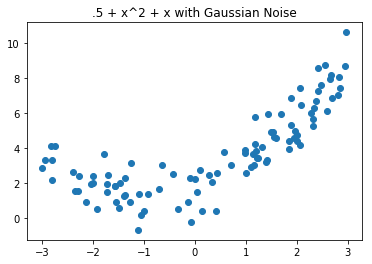

In [37]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X,y)
plt.title(".5 + x^2 + x with Gaussian Noise")


In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

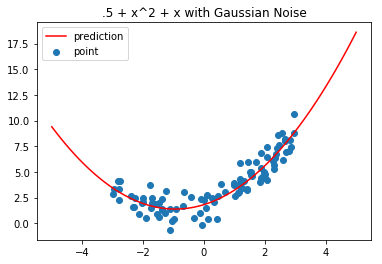

In [83]:
X_space=np.linspace(-5, 5, m).reshape(m, 1)
X_pred_poly = poly_features.transform(X_space)
y_pred = lin_reg.predict(X_pred_poly)
plt.scatter(X, y)
plt.plot(X_new, y_new, "red")
plt.title(".5 + x^2 + x with Gaussian Noise")
plt.legend(["prediction","point"])
plt.show()